In [9]:
import numpy as np
import matplotlib.pyplot as plt

def transmisi_slab(Sig_t, tebal, N):
    """Menghitung fraksi neutron yang lolos melalui slab
    
    Input :
    Sig_t :   tampang lintang makroskopik total
    tebal   :   tebal dari slab
    N       :   banyaknya neutron yang akan disimulasikan
    
    Return:
    transmisi : fraksi neutron yang berhasil lolos melalui slab
    """
    
    # isi bagian ini 
    theta = np.random.random(N)
    x = -np.log(1-theta)/Sig_t
    transmisi = np.sum(x>tebal)/N #perbandingan keluar dan masuk
    
    # buat plot

    plt.figure()
    plt.scatter(x,np.arange(N))
    plt.xlabel("Jarak ke tumbukan (cm)")
    plt.ylabel("Neutron ke-")
    plt.title("Neutron yang disimulasikan ="+str(N)+"\n Fraksi yang lolos ="+str(transmisi))
    xc = tebal
    plt.axvline(x=xc,color='r',linestyle='dotted')
    plt.xlim(0.0, 5.0)
    plt.show()
    
    # Buat plot histogram untuk mengecek apakah partikel yang disimulasikan sesuai PDF
    plt.figure()
    plt.hist(x,200)
    plt.xlabel("Jarak ke tumbukan (cm)")
    plt.ylabel("Banyaknya neutron")
    plt.title("Histogram \n Neutron yang disimulasikan =" + str(N))
    plt.xlim(0.0, 5.0)
    plt.show()
        
    return transmisi

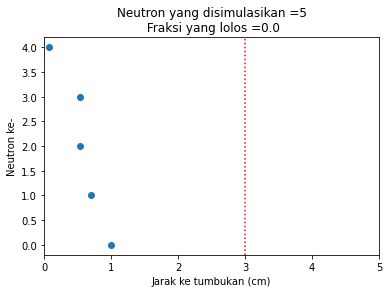

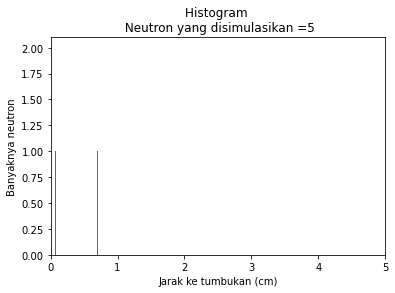

Dari 5 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


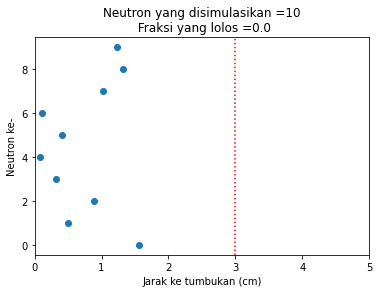

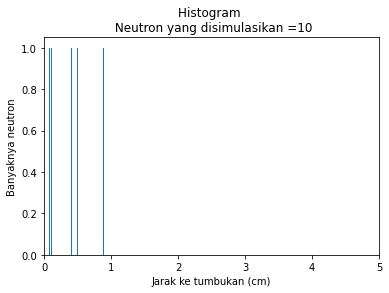

Dari 10 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


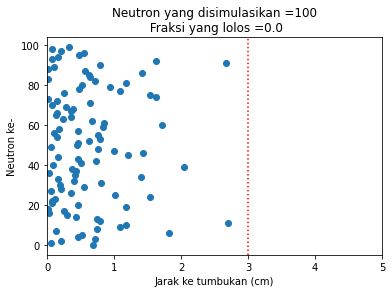

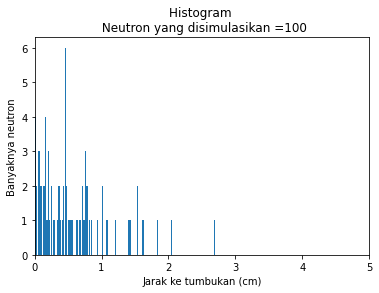

Dari 100 neutron hanya 0 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0 
 Galat = 100.0 %


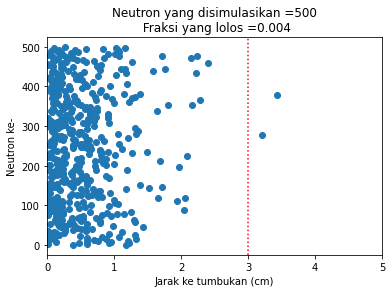

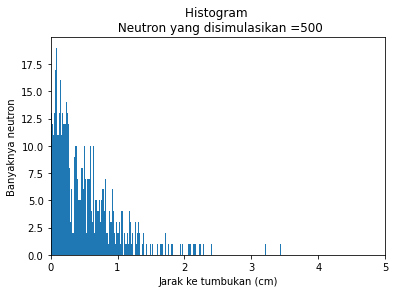

Dari 500 neutron hanya 2 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.004 
 Galat = 99.67725696520581 %


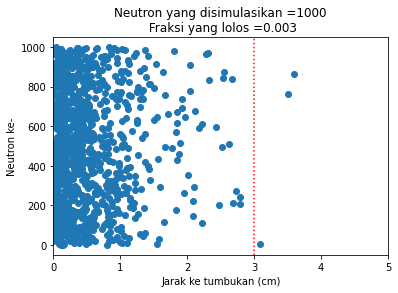

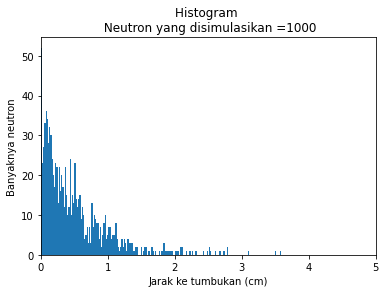

Dari 1000 neutron hanya 3 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.003 
 Galat = 99.87897136195218 %


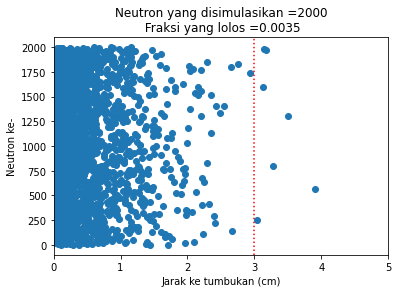

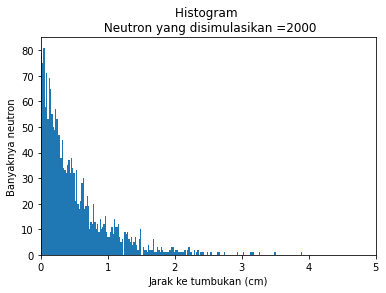

Dari 2000 neutron hanya 7 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0035 
 Galat = 99.92939996113877 %


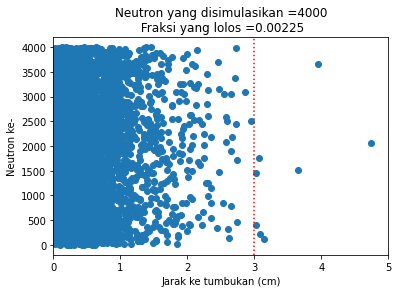

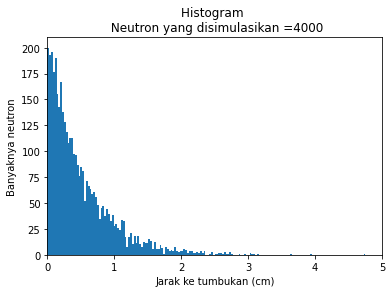

Dari 4000 neutron hanya 9 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00225 
 Galat = 99.97730713036603 %


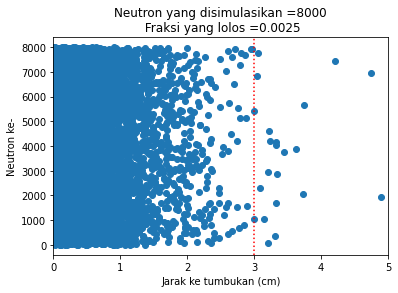

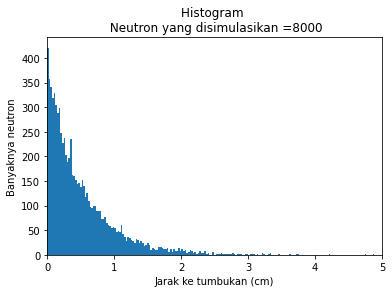

Dari 8000 neutron hanya 20 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0025 
 Galat = 99.98739285020336 %


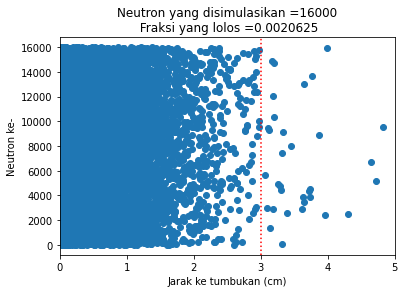

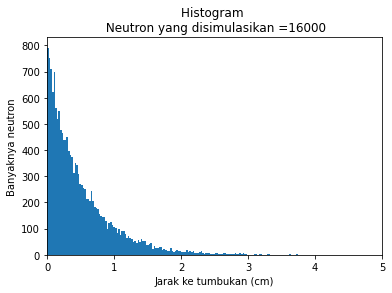

Dari 16000 neutron hanya 33 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0020625 
 Galat = 99.99479955070889 %


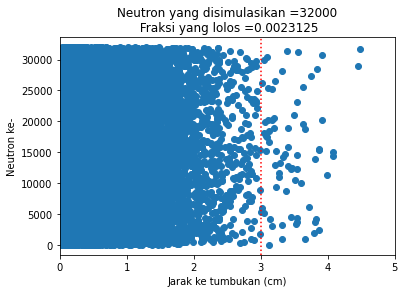

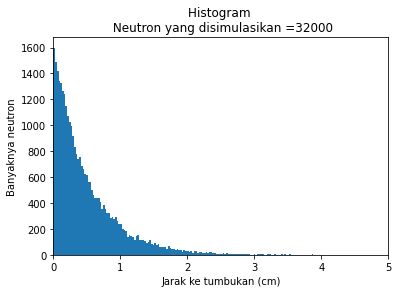

Dari 32000 neutron hanya 74 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0023125 
 Galat = 99.99708459660953 %


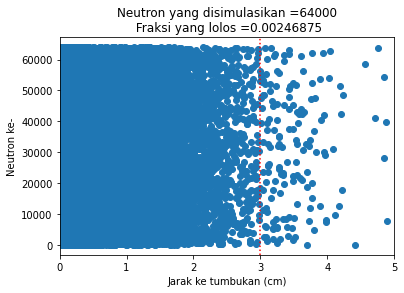

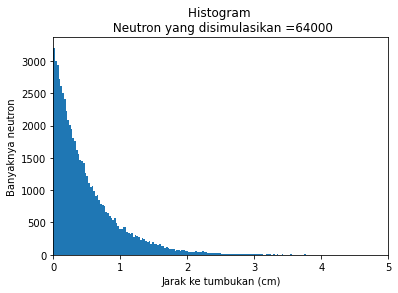

Dari 64000 neutron hanya 158 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00246875 
 Galat = 99.99844380494697 %


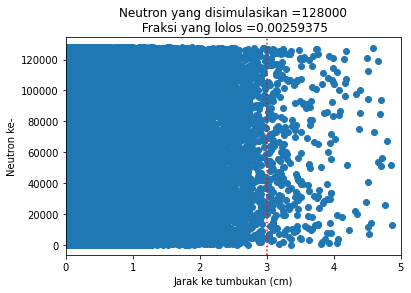

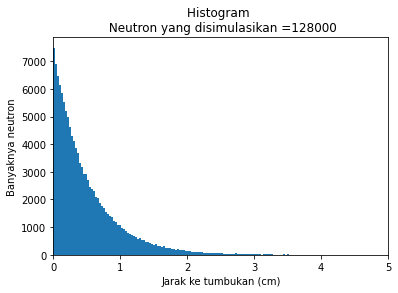

Dari 128000 neutron hanya 332 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00259375 
 Galat = 99.99918250513036 %


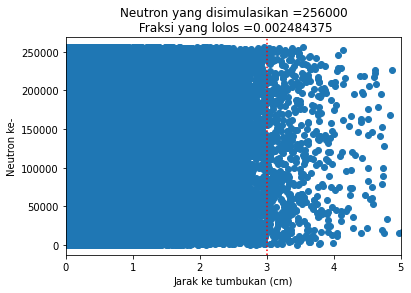

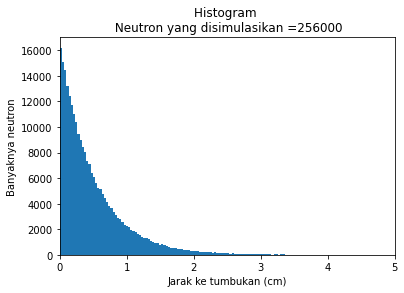

Dari 256000 neutron hanya 636 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.002484375 
 Galat = 99.99960848890281 %


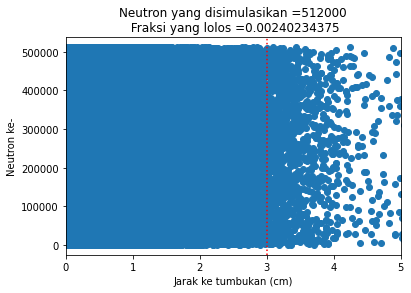

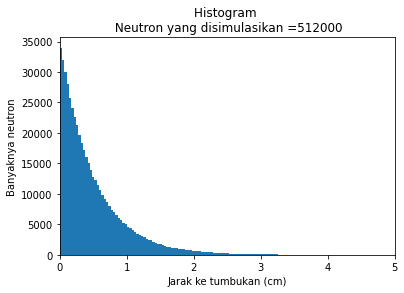

Dari 512000 neutron hanya 1230 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00240234375 
 Galat = 99.999810708078 %


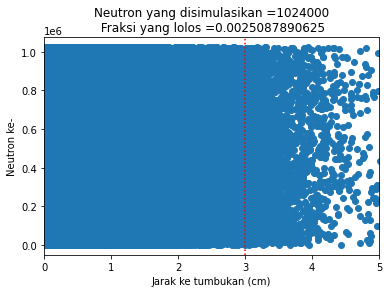

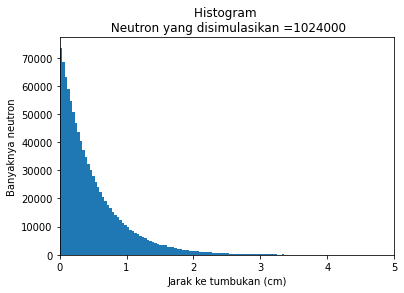

Dari 1024000 neutron hanya 2569 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0025087890625 
 Galat = 99.9999011603765 %


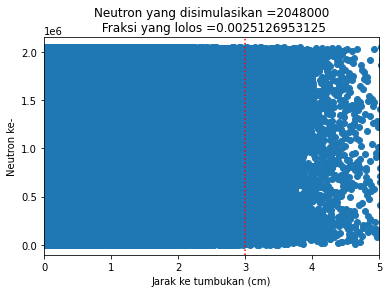

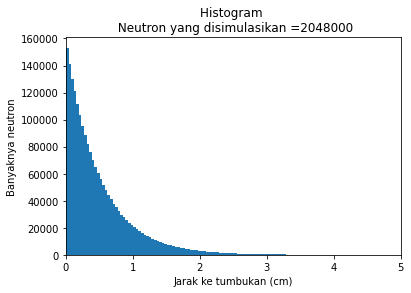

Dari 2048000 neutron hanya 5146 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.0025126953125 
 Galat = 99.99995050324031 %


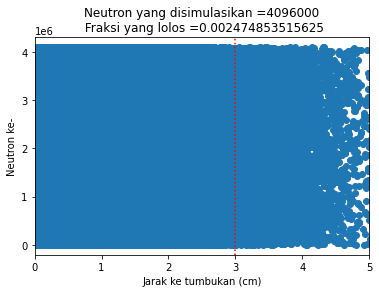

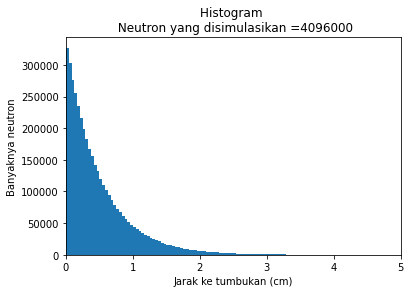

Dari 4096000 neutron hanya 10137 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.002474853515625 
 Galat = 99.99997562433673 %


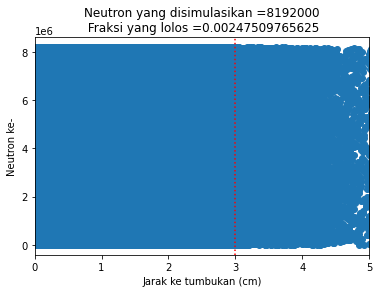

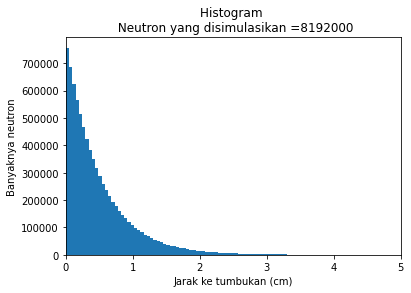

Dari 8192000 neutron hanya 20276 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.00247509765625 
 Galat = 99.99998781096605 %


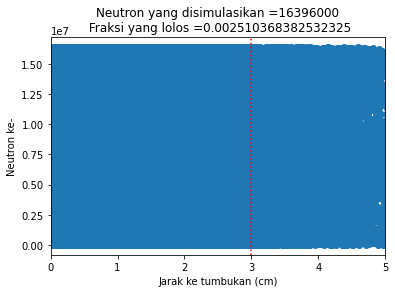

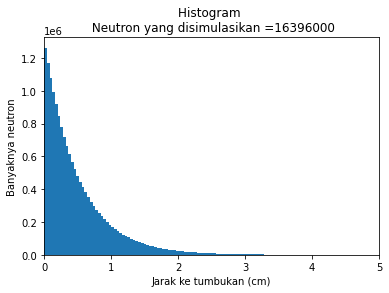

Dari 16396000 neutron hanya 41160 berhasil lolos. 
 Fraksi yang berhasil lolos sebesar 0.002510368382532325 
 Galat = 99.99999382315876 %


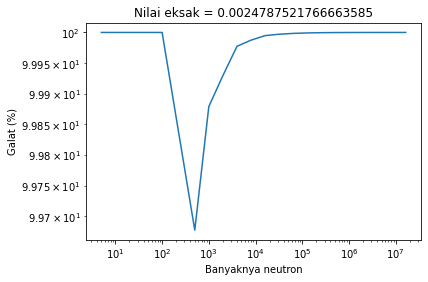

In [10]:
Sigma_t = 2
tebal = 3

neutron = np.array([5,10,100, 500, 1000,2000,4000,8000,16000,32000,
                   64000,128000,256e3, 512e3, 1024e3, 2048e3,4096e3,8192e3,16396e3])

# nilai eksak dihitung dari \int_3^\infty \Sigma_t e^{-\Sigma_t x} dx = e^{-2\times 3} 
nilai_eksak = np.exp(-Sigma_t * tebal)

galat = []

for N in neutron:
    lolos = transmisi_slab(Sigma_t,tebal, int(N))
    galat.append(np.abs(lolos-nilai_eksak)/nilai_eksak*100)
    
    print("Dari",int(N),"neutron hanya",int(lolos*N),
          "berhasil lolos. \n Fraksi yang berhasil lolos sebesar",lolos,
         "\n Galat =",galat[-1],"%")

# plot galat
plt.figure()
plt.loglog(neutron,galat)
plt.xlabel("Banyaknya neutron")
plt.ylabel("Galat (%)")
plt.title("Nilai eksak = " + str(nilai_eksak))
plt.show()
    
    